1. Сформулируем вопрос: "Cкорость движения водителей в Москве и Санкт-Петербурге не отличается"

2. Проведем исследование данных 

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

2.1 Загрузка и первый взгляд на данные

In [2]:
df_speeds_msk_spb = pd.read_csv('speeds_msk_spb.csv')
df_graph_msk_spb = pd.read_csv('graph_msk_spb.csv')

In [3]:
df_speeds_msk_spb.shape

(100000, 4)

In [4]:
df_graph_msk_spb.shape

(3642676, 6)

In [5]:
df_speeds_msk_spb.head(10)

,city,d,speed,edge_id
0,moscow,2021-04-18 15:12:38.0,11.0,9008633773888464
1,spb,2021-04-20 18:33:20.0,14.0,10697483669328064
2,spb,2021-04-25 09:16:15.0,32.0,140060152287166551
3,moscow,2021-04-01 05:50:42.0,49.0,9008633774122639
4,moscow,2021-04-12 07:56:15.0,17.0,9008633773945601
5,moscow,2021-04-23 21:10:55.0,24.0,9008633870552733
6,moscow,2021-04-01 17:27:32.0,18.0,140060152286422790
7,spb,2021-04-01 00:01:34.0,11.0,140060152298700950
8,moscow,2021-04-09 13:40:33.0,19.0,9008633773970961
9,moscow,2021-04-05 19:20:48.0,40.0,9008633773871087


In [6]:
df_graph_msk_spb.head(10)

,city,edge_id,length,width,lanes,def_speed
0,moscow,9008633774264073,34,3,1,20
1,moscow,140060152382786279,2063,3,0,3
2,moscow,9008633773969938,56,3,1,20
3,moscow,140060152340174253,62,3,1,20
4,moscow,140060152287285068,14,4,1,60
5,moscow,140060152269158061,297,3,1,20
6,moscow,140060152350398856,16,3,1,20
7,moscow,140060152392182196,69,3,1,20
8,moscow,9008633774315912,126,7,2,90
9,moscow,9008633800077359,103,3,0,3


In [7]:
df_speeds_msk_spb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   city     100000 non-null  object 
 1   d        100000 non-null  object 
 2   speed    100000 non-null  float64
 3   edge_id  100000 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ MB


In [8]:
df_graph_msk_spb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642676 entries, 0 to 3642675
Data columns (total 6 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   city       object
 1   edge_id    int64 
 2   length     int64 
 3   width      int64 
 4   lanes      int64 
 5   def_speed  int64 
dtypes: int64(5), object(1)
memory usage: 166.7+ MB


In [9]:
df_graph_msk_spb.describe(include=['object'])

,city
count,3642676
unique,2
top,moscow
freq,2527238


In [10]:
df_speeds_msk_spb.describe(include=['object'])

,city,d
count,100000,100000
unique,2,96949
top,moscow,2021-04-23 12:12:54.0
freq,62359,4


Посмотрим наличие пустых значений

In [11]:
df_speeds_msk_spb.isnull().sum()

city       0
d          0
speed      0
edge_id    0
dtype: int64

In [12]:
df_graph_msk_spb.isnull().sum()

city         0
edge_id      0
length       0
width        0
lanes        0
def_speed    0
dtype: int64

In [13]:
df_graph_msk_spb.count()

city         3642676
edge_id      3642676
length       3642676
width        3642676
lanes        3642676
def_speed    3642676
dtype: int64

Посмотрим наличие дублей в записях

In [14]:
df_graph_msk_spb.loc[df_graph_msk_spb.duplicated()]

,city,edge_id,length,width,lanes,def_speed


In [15]:
df_speeds_msk_spb.loc[df_speeds_msk_spb.duplicated()]

,city,d,speed,edge_id


2.2 Посмотрите на базовые статистики датасета: средние, медианы, и т.д. скорости для каждого города

In [16]:
df_speeds_msk_spb.loc[df_speeds_msk_spb['city'] == 'moscow'].describe()

,speed,edge_id
count,62359.000000,6.235900e+04
mean,38.283087,5.223573e+16
std,25.119591,6.161539e+16
min,1.000000,9.008634e+15
25%,17.000000,9.008634e+15
50%,36.000000,9.008634e+15
75%,56.000000,1.400602e+17
max,172.000000,1.400602e+17


In [17]:
df_speeds_msk_spb.loc[df_speeds_msk_spb['city'] == 'spb'].describe()

,speed,edge_id
count,37641.000000,3.764100e+04
mean,38.839537,5.754037e+16
std,26.136696,6.217369e+16
min,1.000000,1.069748e+16
25%,17.000000,1.069748e+16
50%,36.000000,1.069748e+16
75%,55.000000,1.400602e+17
max,154.000000,1.400602e+17


Визуализируем целевую метрику

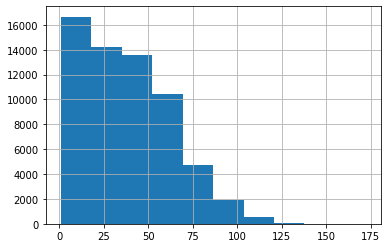

In [18]:
df_speeds_msk_spb.loc[df_speeds_msk_spb['city'] == 'moscow']['speed'].hist();

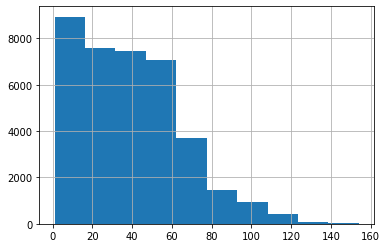

In [19]:
df_speeds_msk_spb.loc[df_speeds_msk_spb['city'] == 'spb']['speed'].hist();

<AxesSubplot:xlabel='city', ylabel='speed'>

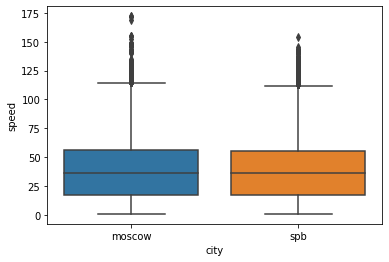

In [121]:
sns.boxplot(x="city", y="speed", data=df_speeds_msk_spb)

Визуально распределения похоже. Медианы и квартили. Но нужно сформировать выборки и провести тесты

________________________________________________________________

2.2 Подготовка данных, генерация доп фич

Приведем дату к соответствующему типу

In [20]:
df_speeds_msk_spb['d'] = pd.to_datetime(df_speeds_msk_spb['d'])

In [21]:
df_speeds_msk_spb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   city     100000 non-null  object        
 1   d        100000 non-null  datetime64[ns]
 2   speed    100000 non-null  float64       
 3   edge_id  100000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.1+ MB


Сформируем дополнительные признаки дня недели и времени

In [22]:
df_speeds_msk_spb["weekday"] = df_speeds_msk_spb['d'].dt.weekday;
df_speeds_msk_spb["hour"] = df_speeds_msk_spb['d'].dt.hour;
df_speeds_msk_spb["is_holiday"] = df_speeds_msk_spb["weekday"].isin([5, 6]) * 1
df_speeds_msk_spb["month"] = df_speeds_msk_spb['d'].dt.month;

In [23]:
df_speeds_msk_spb.head()

,city,d,speed,edge_id,weekday,hour,is_holiday,month
0,moscow,2021-04-18 15:12:38,11.0,9008633773888464,6,15,1,4
1,spb,2021-04-20 18:33:20,14.0,10697483669328064,1,18,0,4
2,spb,2021-04-25 09:16:15,32.0,140060152287166551,6,9,1,4
3,moscow,2021-04-01 05:50:42,49.0,9008633774122639,3,5,0,4
4,moscow,2021-04-12 07:56:15,17.0,9008633773945601,0,7,0,4


In [24]:
df_speeds_msk_spb['month'].unique()

array([4, 3, 9])

In [25]:
df_speeds_msk_spb.drop('d', axis=1, inplace=True)

In [26]:
df_speeds_msk_spb.head()

,city,speed,edge_id,weekday,hour,is_holiday,month
0,moscow,11.0,9008633773888464,6,15,1,4
1,spb,14.0,10697483669328064,1,18,0,4
2,spb,32.0,140060152287166551,6,9,1,4
3,moscow,49.0,9008633774122639,3,5,0,4
4,moscow,17.0,9008633773945601,0,7,0,4


In [27]:
edge_type = df_graph_msk_spb[['length', 'width', 'lanes', 'def_speed']]
edge_type = edge_type.drop_duplicates()
edge_type['edge_type'] = edge_type.index
df_graph_msk_spb = pd.merge(df_graph_msk_spb, edge_type, how='inner',  left_on=['length', 'width', 'lanes', 'def_speed'], right_on=['length', 'width', 'lanes', 'def_speed'])

In [28]:
df_graph_msk_spb.head()

,city,edge_id,length,width,lanes,def_speed,edge_type
0,moscow,9008633774264073,34,3,1,20,0
1,moscow,140060152382772679,34,3,1,20,0
2,moscow,140060152299594684,34,3,1,20,0
3,moscow,9008633774363750,34,3,1,20,0
4,moscow,9008633774155847,34,3,1,20,0


In [29]:
df_graph_speeds_msk_spb = pd.merge(df_speeds_msk_spb, df_graph_msk_spb, how='inner', left_on=['edge_id', 'city'], right_on=['edge_id', 'city'])

In [30]:
df_graph_speeds_msk_spb.drop(['length', 'width', 'lanes', 'def_speed'], axis='columns', inplace=True)

In [31]:
df_graph_speeds_msk_spb.head()

,city,speed,edge_id,weekday,hour,is_holiday,month,edge_type
0,moscow,11.0,9008633773888464,6,15,1,4,65297
1,moscow,7.0,9008633773888464,2,16,0,4,65297
2,spb,14.0,10697483669328064,1,18,0,4,105
3,spb,32.0,140060152287166551,6,9,1,4,67332
4,moscow,49.0,9008633774122639,3,5,0,4,639


посмотрим сколько есть пересечений для анализа

2.2 Сформулируем основню гипотезу H0: средняя скорость движения по одинаковым ребрам в одинаковые дни равна двух городах равна.
Альтернативная гипотеза H1: средняя скорость движения по одинаковым ребрам в одинаковые дни равна двух городах не равна

2.3 Выбор статистических критериев для проверки гипотезы

Выборки независимые. 
Выберем равные маршруты в апреле в среду, и посмотрим на распределение по городам

In [69]:
df_graph_speeds_msk_spb_group_by_spb = df_graph_speeds_msk_spb \
.query("month == 4 and city == 'spb' and weekday == 3") \
.groupby(['edge_type', 'city']) \
.agg({'edge_type': 'count'}) \
.rename(columns={'edge_type': 'edge_type_amount'}) \
.reset_index().sort_values(by='edge_type_amount', ascending=False)

In [70]:
df_graph_speeds_msk_spb_group_by_msk = df_graph_speeds_msk_spb \
.query("month == 4 and city == 'moscow' and weekday == 3") \
.groupby(['edge_type', 'city']) \
.agg({'edge_type': 'count'}) \
.rename(columns={'edge_type': 'edge_type_amount'}) \
.reset_index().sort_values(by='edge_type_amount', ascending=False)

In [126]:
df_graph_speeds_msk_spb_group_by = pd.merge(df_graph_speeds_msk_spb_group_by_msk, 
                                            df_graph_speeds_msk_spb_group_by_spb, 
                                            how='inner', on=['edge_type'], suffixes=('_msk', '_spb'))

In [127]:
df_graph_speeds_msk_spb_group_by.sort_values(by=['edge_type_amount_spb', 'edge_type_amount_msk'], ascending=False)

,edge_type,city_msk,edge_type_amount_msk,city_spb,edge_type_amount_spb
44,1347,moscow,21,spb,22
48,774,moscow,20,spb,21
2,667,moscow,33,spb,20
149,12646,moscow,13,spb,20
9,183,moscow,28,spb,19
...,...,...,...,...,...
1023,68793,moscow,1,spb,1
1025,8201,moscow,1,spb,1
1026,595495,moscow,1,spb,1
1027,598770,moscow,1,spb,1


Посмотрим распределение для наиболее популярного машрута

<AxesSubplot:>

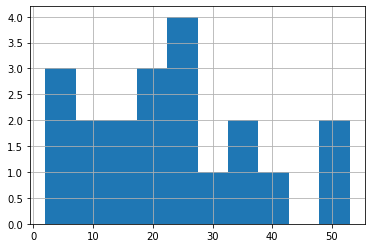

In [135]:
spb_test1 = df_graph_speeds_msk_spb.query("month == 4 and edge_type == 1347 and city == 'spb' and weekday == 3")['speed'].head(20)
spb_test1.hist()

<AxesSubplot:>

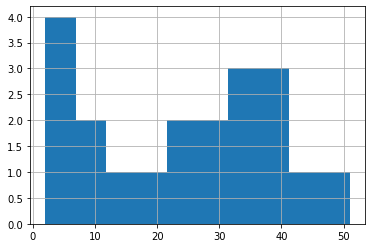

In [136]:
msk_test1 = df_graph_speeds_msk_spb.query("month == 4 and edge_type == 1347 and city == 'moscow' and weekday == 3")['speed'].head(20)
msk_test1.hist()

Посмотрим на boxplot

<AxesSubplot:xlabel='city', ylabel='speed'>

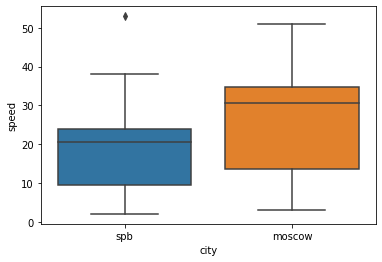

In [141]:
sns.boxplot(x="city", y="speed", data=df_graph_speeds_msk_spb.query("month == 4 and edge_type == 1347 and weekday == 3").head(20))

Для не параметрических критериев выбросы не критичны, поэтому оставим их в выборках

##### Визуальный анализ: Распределения не нормально распределены и не сильно похожи => используем не параметрические критерии

In [142]:
spb_test1.describe()

count    20.000000
mean     22.700000
std      14.312674
min       2.000000
25%      12.500000
50%      22.000000
75%      32.250000
max      53.000000
Name: speed, dtype: float64

In [143]:
msk_test1.describe()

count    20.000000
mean     24.350000
std      15.475873
min       2.000000
25%       7.750000
50%      26.500000
75%      36.750000
max      51.000000
Name: speed, dtype: float64

##### Манна-Уитни для сравнения средних

In [144]:
scipy.stats.mannwhitneyu(spb_test1,msk_test1)

MannwhitneyuResult(statistic=184.5, pvalue=0.34235066002701375)

Манна-Уитни показывает высокое значение pvalue => принимаем основну, отвергаем альтернативную о равенстве средних

##### Критерий Муда для сравнения дисперсий

In [145]:
scipy.stats.mood(spb_test1,msk_test1)

(-1.0378122879814413, 0.29935745489020704)

In [146]:
scipy.stats.levene(spb_test1,msk_test1)

LeveneResult(statistic=0.764500168895424, pvalue=0.38741657986332223)

*Вывод*: Оба критерия показывают высокое pvalue => принимаем основну, отвергаем альтернативную о равенстве дисперсий

Применим тест Комлогорова-Смирнова согласия двух выборок:

In [147]:
scipy.stats.ks_2samp(spb_test1,msk_test1)

KstestResult(statistic=0.2, pvalue=0.8319696107963263)

высокое значение pvalue не дает нам право отклонить нулевую гипотезу => наши выборки из одного закона распределения 

По результатам не параметрических тестов мы не можем отклонить нулевую гипотезу => мы отклоняем альтернативную гипотезу

Расмотрим еще пару выборок 

<AxesSubplot:>

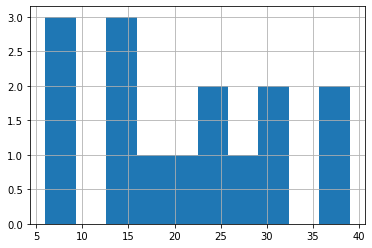

In [183]:
spb_test2 = df_graph_speeds_msk_spb.query("month == 4 and edge_type == 774 and city == 'spb' and weekday == 4")['speed'].head(15)
spb_test2.hist()

<AxesSubplot:>

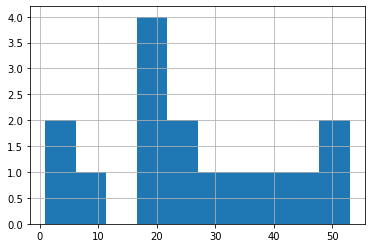

In [184]:
msk_test2 = df_graph_speeds_msk_spb.query("month == 4 and edge_type == 774 and city == 'moscow' and weekday == 4")['speed'].head(15)
msk_test2.hist()

In [185]:
msk_test2.describe()

count    15.000000
mean     25.400000
std      15.674365
min       1.000000
25%      17.000000
50%      23.000000
75%      36.000000
max      53.000000
Name: speed, dtype: float64

In [186]:
spb_test2.describe()

count    15.000000
mean     21.133333
std      10.702915
min       6.000000
25%      13.500000
50%      21.000000
75%      29.500000
max      39.000000
Name: speed, dtype: float64

<AxesSubplot:xlabel='city', ylabel='speed'>

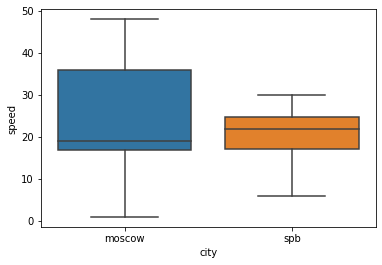

In [187]:
sns.boxplot(x="city", y="speed", data=df_graph_speeds_msk_spb.query("month == 4 and edge_type == 774 and weekday == 4").head(15))

In [177]:
scipy.stats.mannwhitneyu(spb_test2,msk_test2)

MannwhitneyuResult(statistic=93.5, pvalue=0.22133690649820115)

In [178]:
scipy.stats.mood(spb_test2,msk_test2)

(-1.1203059070900365, 0.26258342569109905)

In [179]:
scipy.stats.levene(spb_test2,msk_test2)

LeveneResult(statistic=1.7261733615221984, pvalue=0.19956371896946629)

In [180]:
scipy.stats.ks_2samp(spb_test2,msk_test2)

KstestResult(statistic=0.26666666666666666, pvalue=0.6781382270680966)

Также все тесты показали высокое значение pvalue

По результатам проведенных тестов мы не смогли отвергнуть основную гипотезу о равенстве средней скорость движения водителей в Москве и Санкт-Петербурге

Дополнительные рассуждения: непараметрические критерии обладают не высокой мощьностью, но позволяют работать с ненормально распределенными данными, в даном случае выборки не большие, визуально кажется что стоит отвергнуть H0, но стат критерии говорят об обратном. Возможно стоило лучше подбирать данные для выборок